In [114]:
#import dependencies
from sqlalchemy import create_engine , desc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [84]:
# Create an engine to a SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [85]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# map station class
Station = Base.classes.station
# map measurement class
Measurement = Base.classes.measurement

In [5]:
# create a session
session = Session(engine)

### Precipitation Analysis

Last 12 months of precipitation data

In [47]:
prec_per_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2017-04-04').all()
prec_per_date_df = pd.DataFrame(prec_per_date)
prec_per_date_df.set_index('date')
prec_per_date_df.head(5)
len(prec_per_date_df)

814

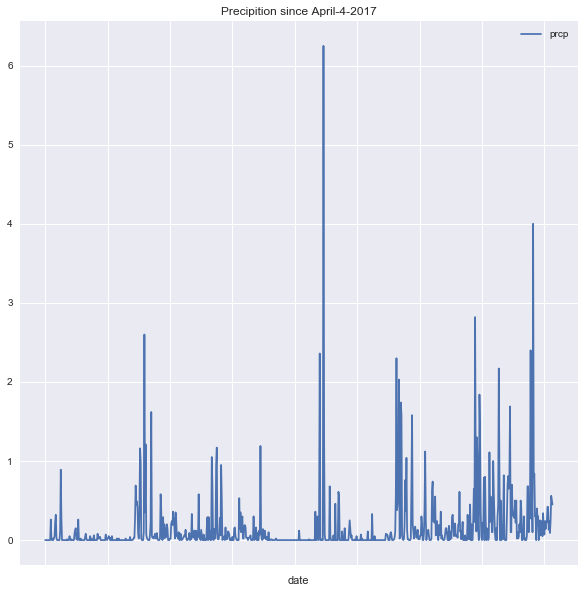

<Figure size 432x288 with 0 Axes>

In [69]:
prec_per_date_df.plot( x='date', y='prcp', kind='line',\
                      rot=90, title='Precipition since April-4-2017', legend=True, figsize=(10,10))
plt.show()
plt.tight_layout()

In [29]:
prec_per_date_df.describe()

,prcp
count,814.000000
mean,0.161665
std,0.418588
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.250000


### Station Analysis

In [77]:
# total number of stations.
total_stations = session.query(Station.station).all()
print(f'Total number of stations: {len(total_stations)}')

Total number of stations: 9


In [93]:
# most active stations.
selections = [Measurement.station, func.count(Measurement.station)]
active_stations = session.query(*selections).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
print(active_stations)
print(f'\n\nThe station with highest number of temperature observations is: {active_stations[0][0]}')

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


The station with highest number of temperature observations is: USC00519281


In [118]:
tobs_query = session.query(Measurement.tobs)\
        .filter(Measurement.date > '2017-04-04').filter(Measurement.station == 'USC00519281').all()

In [119]:
tobs_query = np.array(tobs_query)

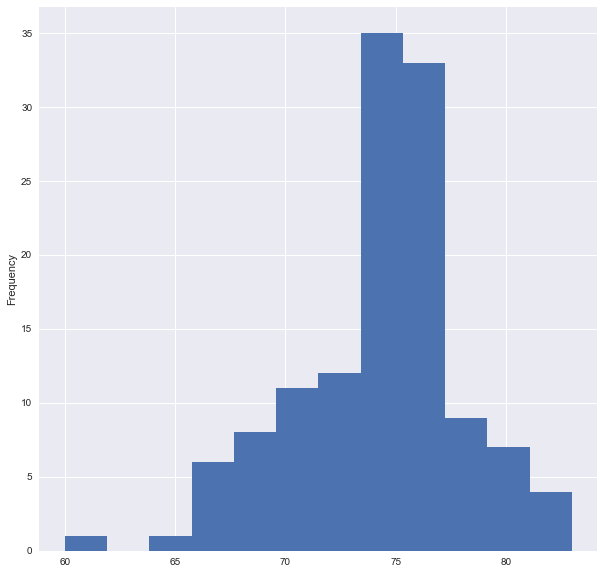

<Figure size 432x288 with 0 Axes>

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(tobs_query, bins=12)
plt.ylabel('Frequency')
plt.show()
plt.tight_layout()

### Temperature Analysis